HOG (Histogram of Oriented Gradients) - метод для обнаружения объектов на изображениях.

Для повышения точности детекции рекомендуется:
1) Перевести изображения в ч/б.
2) Локальные гистограммы нормализовать по контрасту относительно меры интенсивности, вычисляемой на большем фрагменте изображения (чтобы качество детекции меньше зависело от освещения на картинке).

Первоначально алгоритм использовался для обнаружения пешеходов на картинке. Изображения были в ч/б + выровнены и центрированы.

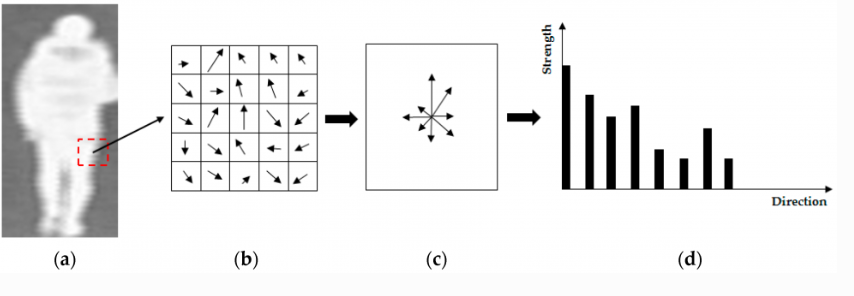

В оригинальной реализации размер входного изображения - 64 х 128. Выходной вектор содержит 3 780 элементов. Выделяемые для обработки фрагменты должны иметь соотношение ширины к длине 1:2 (64 * 128, 100 * 200, 150 * 300, ...) (если мы собираемся подавать на вход изображение больше, чем базовые 64 * 128).

Чтобы вычислить дескриптор HOG, нам нужно сначала вычислить горизонтальный и вертикальный градиенты. Это достигается путем фильтрации изображения с помощью следующих ядер:

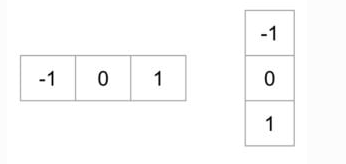

In [11]:
# применение данных фильтров с opencv и numpy
import cv2
import numpy as np

# Прочитать изображение
img = cv2.imread('photo.jpg')
img = np.float32(img) # 255.0

# Рассчитать градиент
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

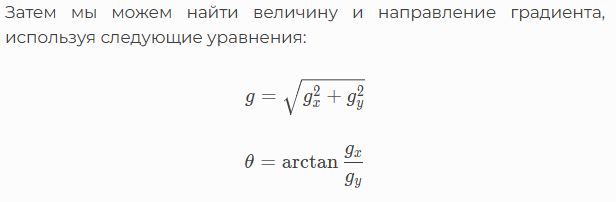

In [12]:
# вычисляем величину и направление градиента (в градусах) с помощью ф-ции opencv
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

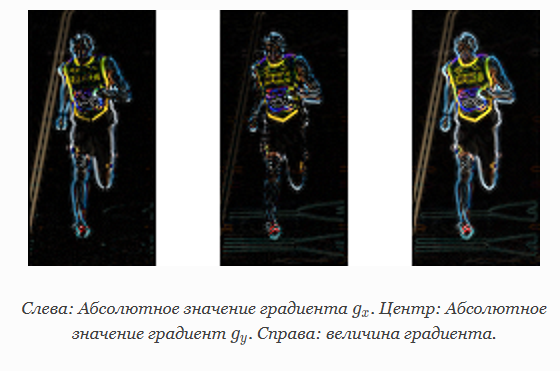

Как видим, градиент g по x проявляется на вертикальных линиях, g по у - на горизонтальных, а вспышки величины градиентов - на границе объектов (так как здесь наблюдается резкое изменение интенсивности).

В каждом пикселе градиент имеет величину и направление. Для цветных изображений оцениваются градиенты трех каналов. Величина градиента в пикселе — это максимум величины градиентов трех каналов, а угол — это угол, соответствующий максимальному градиенту.

Далее делим изображение на ячейки 8 на 8. Вычисляется гистограмма градиентов для каждой такой ячейки.

Гистограмма представляет собой вектор (или массив) из 9 интервалов (чисел), соответствующих углам 0, 20, 40, 60 … 160.



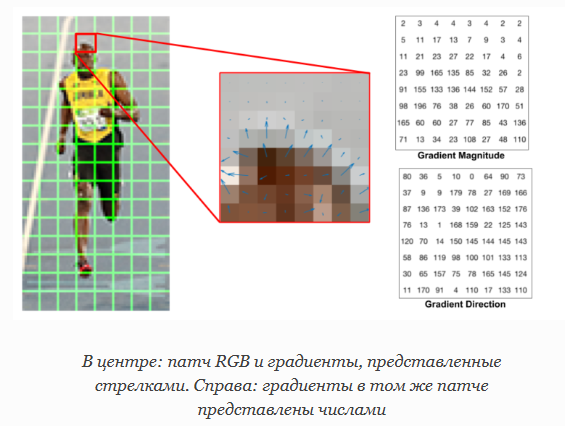

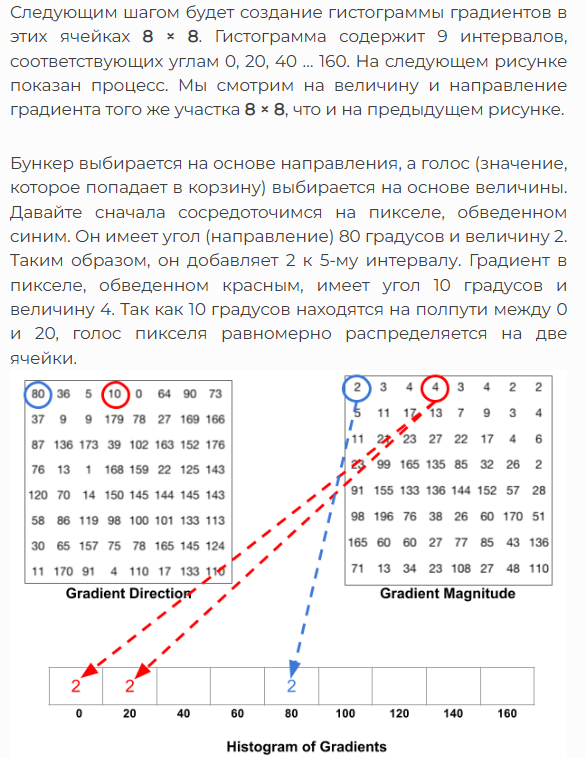

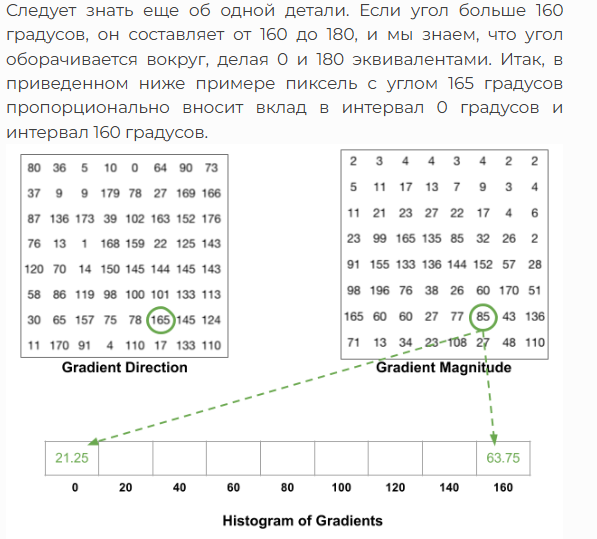

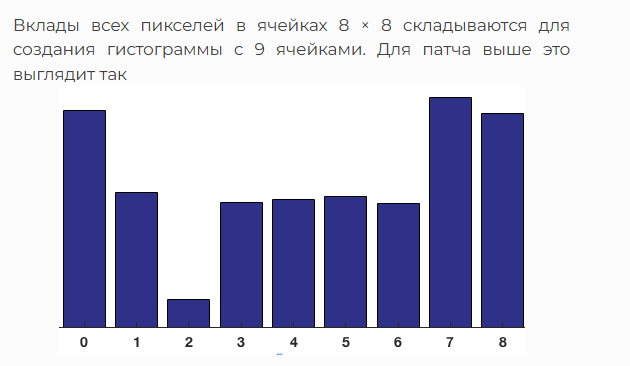

На предыдущем шаге мы создали гистограмму на основе градиента изображения. Градиенты изображения чувствительны к общему освещению. Если сделать изображение темнее, разделив все значения пикселей на 2, величина градиента изменится вдвое, и, следовательно, значения гистограммы изменятся вдвое.

В идеале, мы хотим, чтобы наш дескриптор не зависел от вариаций освещения. Другими словами, мы хотели бы «нормализовать» гистограмму, чтобы на них не влияли изменения освещения.

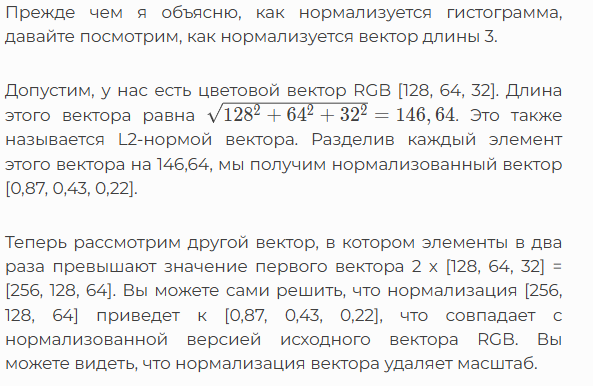

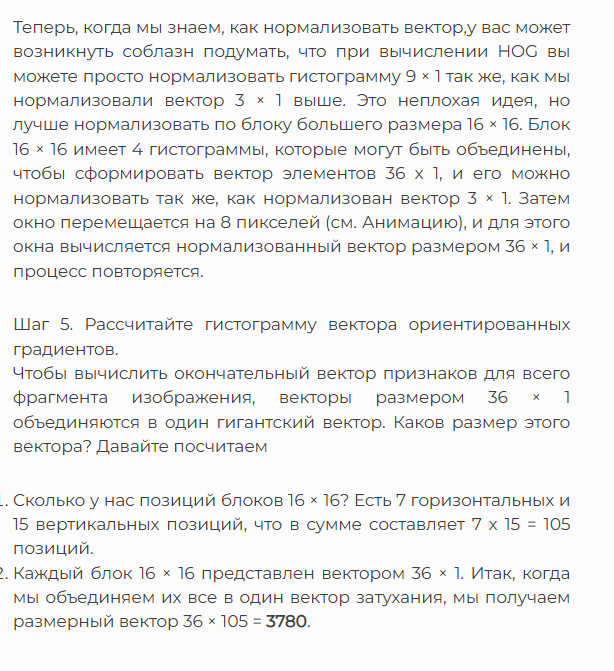